In [172]:
%matplotlib inline
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# 装载数据库

In [173]:
db_filename='dinofunworld.db'
conn = sqlite3.connect(db_filename)
cursor = conn.cursor()


# 作业1

游乐园管理员对数据窗口中游乐项目“Atmosfear”的参入量表示担心。为了减轻他们的压力，他们要求你创建一个此游乐项目总参入量的控制图。使用提供的数据，创建一个控制图，以显示参入量、平均值以及一到两个标准差的标准差带。

获取Atmosfear的AttractionID

In [174]:
sql = ("SELECT AttractionID "
       "FROM attraction "
       "WHERE "
       "name='Atmosfear' ")

data = cursor.execute(sql).fetchall()
Atmosfear_ID = data[0][0]

开始查询处理序列数据，并绘图

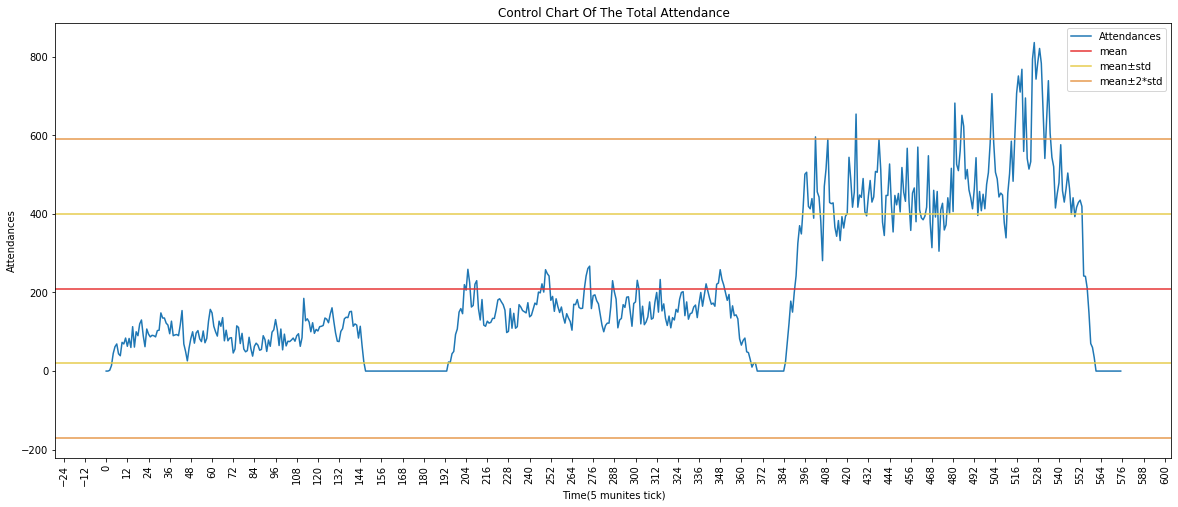

In [175]:
from matplotlib.pyplot import MultipleLocator
import pylab
pylab.rcParams['figure.figsize'] = (20, 8.0)

sql = ("SELECT sequence "
       "FROM checkin t1,attraction t2,sequences t3 "
       "WHERE "
       "t2.name='Atmosfear' "
       "AND SUBSTR(t1.timestamp,1,10)='2014-06-08'"
       "AND t1.attraction = t2.AttractionID "
       "AND t3.visitorID = t1.visitorID")

data = cursor.execute(sql).fetchall()
seq = []
for row in data:
    seq.append([int(a) for a in row[0].split("-")])

df = pd.DataFrame(seq)
ser = []
for i in range(df.shape[1]):
      ser.append(df[df[i]==Atmosfear_ID].shape[0])

seq_df = pd.DataFrame(ser,columns=['Attendances'])

mean = seq_df['Attendances'].mean()
std = seq_df['Attendances'].std()

ax = plt.gca()

ax.plot(seq_df.index.to_list(),seq_df['Attendances'].to_list(),label='Attendances')
ax.axhline(y=mean,color=(0.9, 0.2, 0.2, 1),label='mean')
ax.axhline(y=mean+std,color=(0.9, 0.8, 0.3, 1),label='mean±std')
ax.axhline(y=mean+2*std,color=(0.9, 0.6, 0.3, 1),label='mean±2*std')
ax.axhline(y=mean-std,color=(0.9, 0.8, 0.3, 1))
ax.axhline(y=mean-2*std,color=(0.9, 0.6, 0.3, 1))
ax.set_ylabel('Attendances')
ax.set_xlabel('Time(5 munites tick)')
ax.set_title("Control Chart Of The Total Attendance")
ax.xaxis.set_major_locator(MultipleLocator(12))
plt.xticks(rotation=90)

plt.legend()
plt.show()



# 作业2

游乐园的一些管理员在解释“Atmosfear”参入量的控制图时遇到困难，因此他们要求你除了提供在上一个问题中创建的控制图外，还要提供参入量的移动平均图。在此情况下，他们要求你针对移动平均窗口的大小使用 50 个样本。

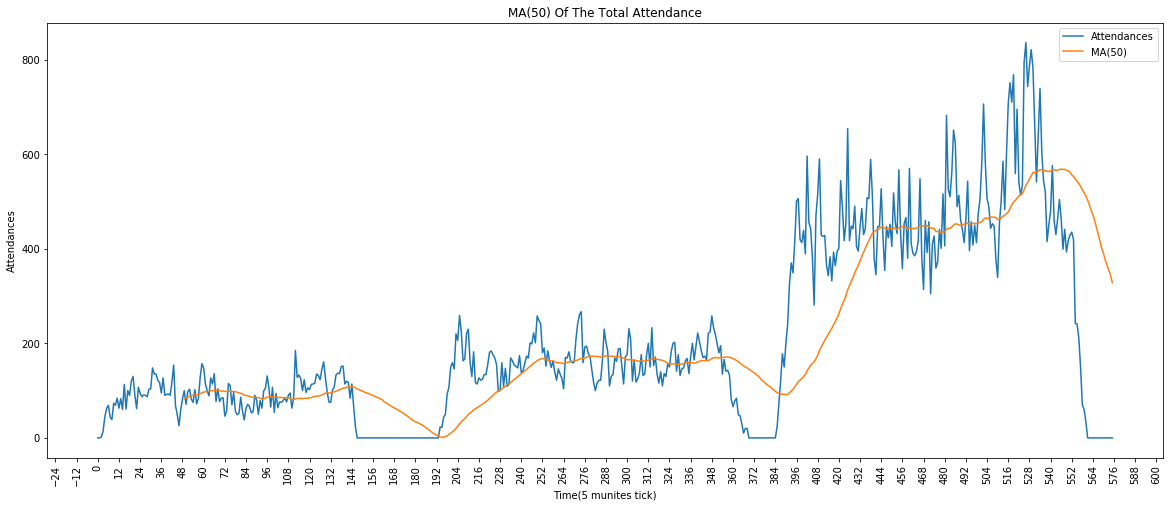

In [176]:
ax = plt.gca()

ax.plot(seq_df.index.to_list(),seq_df['Attendances'].to_list(),label='Attendances')
ax.plot(seq_df.index.to_list(),seq_df.rolling(50).mean()['Attendances'].to_list(),label='MA(50)')
ax.set_ylabel('Attendances')
ax.set_xlabel('Time(5 munites tick)')
ax.set_title("MA(50) Of The Total Attendance")
ax.xaxis.set_major_locator(MultipleLocator(12))
plt.xticks(rotation=90)

plt.legend()
plt.show()


# 作业3

为了提供有关图表的选项，游乐园管理员还要求你提供一个包含 50 个样本的移动平均窗口，其中通过相同的“Atmosfear”参入量数据使用指数加权（即指数加权移动平均值）计算平均值。

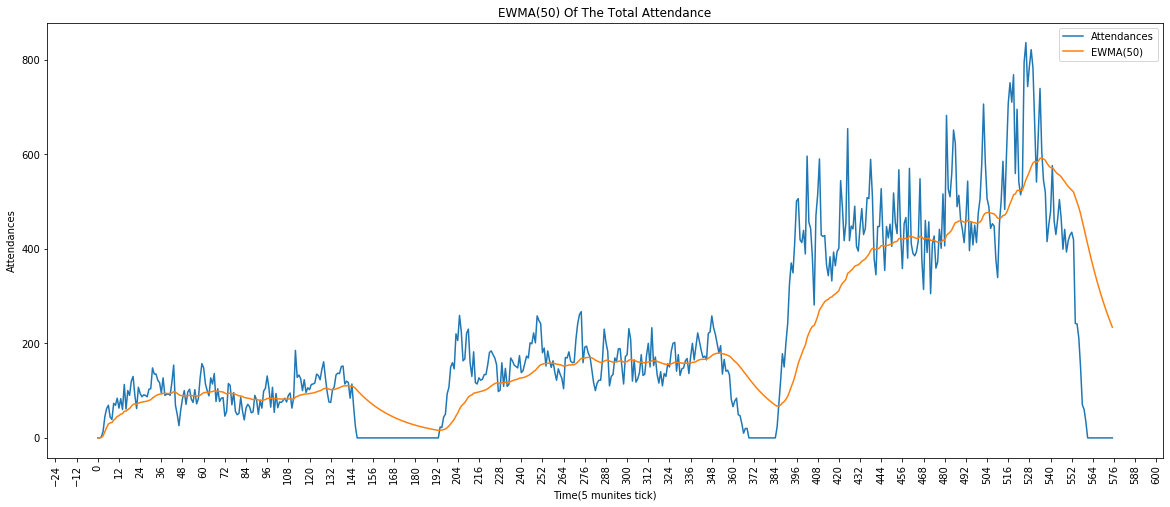

In [177]:
ax = plt.gca()

ax.plot(seq_df.index.to_list(),seq_df['Attendances'].to_list(),label='Attendances')
ax.plot(seq_df.index.to_list(),seq_df.ewm(span=50).mean()['Attendances'].to_list(),label='EWMA(50)')
ax.set_ylabel('Attendances')
ax.set_xlabel('Time(5 munites tick)')
ax.set_title("EWMA(50) Of The Total Attendance")
ax.xaxis.set_major_locator(MultipleLocator(12))
plt.xticks(rotation=90)

plt.legend()
plt.show()
